## Analysing Garmin running data 

How to get the latest data from Garmin Connect

- Activities - select running symbol - select Advanced symbol
- Create your Date Range 
- Select Filter Activities
- Export csv -> Activities.csv

In [55]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("./data/Activities.csv")

df = df[df['Activity Type']=="Running"]
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True) 
df['Distance'] = df['Distance'].str.replace(',', '.').astype(float)
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True) 
df['Time'] = pd.to_timedelta(df['Time'].dt.time.astype(str)).dt.total_seconds()
df['Time'] = np.round((df['Time']/60),2)
df['Moving Time'] = pd.to_datetime(df['Moving Time'], infer_datetime_format=True) 
df['Moving Time'] = pd.to_timedelta(df['Moving Time'].dt.time.astype(str)).dt.total_seconds()
df['Moving Time'] = np.round((df['Moving Time']/60),2)
df['Elapsed Time'] = pd.to_datetime(df['Elapsed Time'], infer_datetime_format=True) 
df['Elapsed Time'] = pd.to_timedelta(df['Elapsed Time'].dt.time.astype(str)).dt.total_seconds()
df['Elapsed Time'] = np.round((df['Elapsed Time']/60),2)
df['Aerobic TE'] = df['Aerobic TE'].str.replace(',', '.').astype(float)

df['Avg_Pace_minutes'] = df['Avg Pace'].str.rsplit(':').str[0].astype(int)*60 
df['Avg_Pace_seconds'] = df['Avg Pace'].str.rsplit(':').str[-1].astype(int) 
df['avg_pace_in_seconds_per_km'] = df['Avg_Pace_seconds'] + df['Avg_Pace_minutes']
df['avg_pace_in_min_per_km'] = np.round((df['avg_pace_in_seconds_per_km']/60),2)
df['avg_pace_in_kmph'] = np.round((60/df['avg_pace_in_min_per_km']),2)


df['Best_Pace_minutes'] = df['Best Pace'].str.rsplit(':').str[0].astype(int)*60
df['Best_Pace_seconds'] = df['Best Pace'].str.rsplit(':').str[-1].astype(int) 
df['best_pace_seconds_per_km'] = df['Best_Pace_seconds'] + df['Best_Pace_minutes']
df['best_pace_in_min_per_km'] = np.round((df['best_pace_seconds_per_km']/60),2)
df['best_pace_in_kmph'] = np.round((60/df['best_pace_in_min_per_km']),2)

df['Avg GCT Balance'] = df['Avg GCT Balance'].str.replace('--','')
df['Avg GCT Balance'] = df['Avg GCT Balance'].apply(lambda x: x.strip()).replace('', np.nan)
df['GCT_left'] = df['Avg GCT Balance'].astype(str).str[0:4]
df['GCT_right'] = df['Avg GCT Balance'].astype(str).str[10:14]
df['GCT_right'] = df['GCT_right'].apply(lambda x: x.strip()).replace('', np.nan)
df['GCT_left'] = df['GCT_left'].str.replace(',', '.').astype(float)
df['GCT_right'] = df['GCT_right'].str.replace(',', '.').astype(float)
df = df.drop('Avg GCT Balance',axis=1)

convert_to_numeric = ['Total Ascent','Total Descent']
convert_to_numeric_w_comma = ['Avg Stride Length','Avg Vertical Ratio','Avg Vertical Oscillation']

for cl in convert_to_numeric:
  df[str(cl)] = pd.to_numeric(df[str(cl)], errors='coerce')

for cl in convert_to_numeric_w_comma:
  df[str(cl)] = df[str(cl)].str.replace(',', '.').astype(float)

df = df.sort_values(by='Date',ascending=True)
df['Distance_cumsum'] = df['Distance'].cumsum()

df = df.reset_index(drop=True)

df = df.fillna(0)

df = df[['Date', 'Distance', 'Distance_cumsum', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Avg Ground Contact Time',
       'Moving Time', 'Elapsed Time', 'avg_pace_in_min_per_km','avg_pace_in_kmph',
       'best_pace_in_min_per_km', 'best_pace_in_kmph','GCT_left', 'GCT_right',]]

df.head(8)
#df.tail()

,Date,Distance,Distance_cumsum,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Moving Time,Elapsed Time,avg_pace_in_min_per_km,avg_pace_in_kmph,best_pace_in_min_per_km,best_pace_in_kmph,GCT_left,GCT_right
0,2021-08-18 16:55:02,4.56,4.56,323,25.65,157,180,3.3,149,217,1.20,0.0,0.0,0,0.00,25.65,5.63,10.66,4.10,14.63,0.0,0.0
1,2021-08-20 16:58:40,4.30,8.86,319,25.88,158,180,3.2,151,216,1.10,0.0,0.0,0,0.00,25.88,6.02,9.97,3.97,15.11,0.0,0.0
2,2021-08-20 17:29:24,0.97,9.83,63,4.11,178,193,2.2,165,177,1.43,0.0,0.0,0,0.00,4.11,4.23,14.18,3.78,15.87,0.0,0.0
3,2021-08-22 10:08:02,5.02,14.85,355,27.10,163,177,3.6,164,219,1.13,0.0,0.0,0,0.00,27.20,5.40,11.11,4.75,12.63,0.0,0.0
4,2021-08-25 17:35:45,6.01,20.86,434,33.85,165,180,4.0,156,228,1.14,0.0,0.0,0,0.00,33.95,5.63,10.66,3.92,15.31,0.0,0.0
5,2022-01-20 17:39:20,4.27,25.13,297,25.40,154,184,3.8,162,233,1.04,0.0,0.0,0,25.40,25.40,5.95,10.08,2.50,24.00,0.0,0.0
6,2022-01-26 17:41:08,5.14,30.27,397,31.22,155,168,3.9,160,176,1.03,0.0,0.0,0,30.98,31.22,6.07,9.88,3.32,18.07,0.0,0.0
7,2022-02-01 16:03:27,4.78,35.05,360,30.08,151,173,3.4,149,217,1.07,0.0,0.0,0,28.93,30.08,6.30,9.52,3.95,15.19,0.0,0.0


In [57]:
print(df.Date.min())

2021-08-18 16:55:02


In [58]:
print(df.Date.max())

2022-12-03 09:47:09


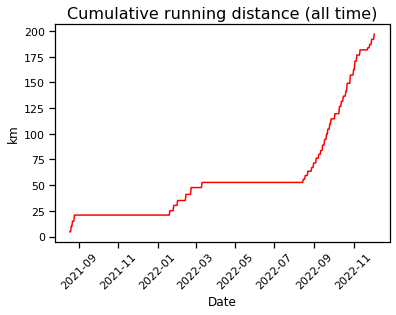

In [59]:
sns.set_context("notebook")

period = df.copy()
period.index=df.Date
del period['Date']
period = pd.DataFrame(period.groupby(pd.Grouper(freq='D'))['Distance'].sum())
period['Distance_cumsum'] = period['Distance'].cumsum()
period = period.reset_index()

"""fig = px.line(period, x="Date", y="Distance_cumsum")
fig.show(renderer="colab")"""

plt.figure()#figsize=(5,5)
line=sns.lineplot(x=period.Date, y=period.Distance_cumsum, color="r") #marker='o'
plt.xticks(rotation=45)
#plt.yticks(size=5, horizontalalignment='right',fontweight='light',fontsize='large')

plt.xlabel('Date',size=12)
plt.ylabel('km',size=12)
plt.title('Cumulative running distance (all time)',size=16)
plt.show()

- Started running (consistent) since 15/8/2022 

In [60]:
print(df.shape)
df = df[df['Date']>'2022-08-14']
print(df.shape)

(40, 22)
(29, 22)


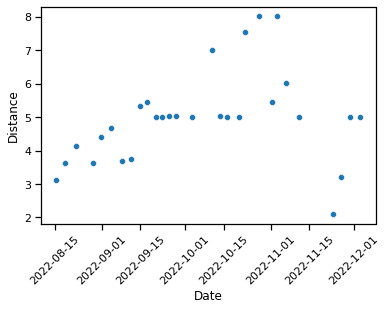

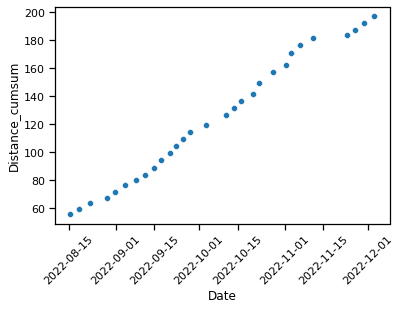

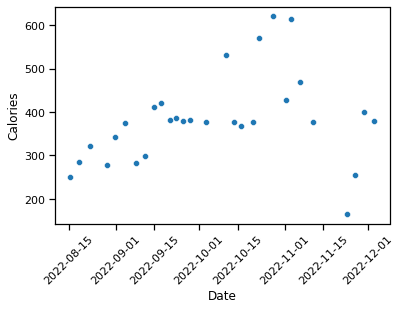

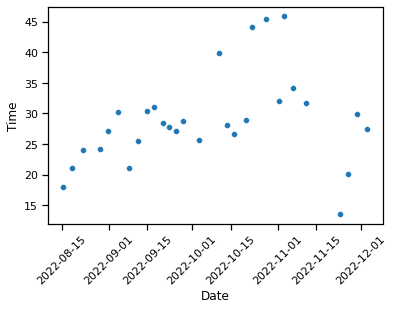

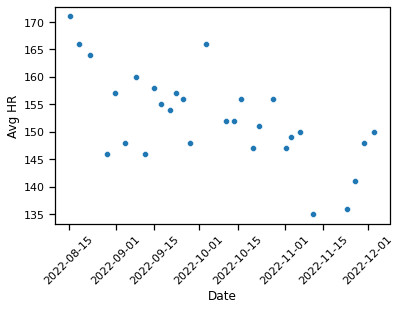

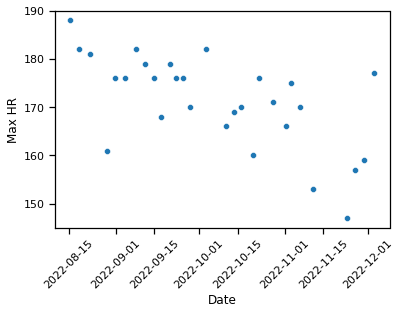

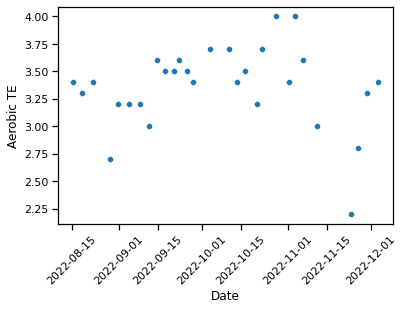

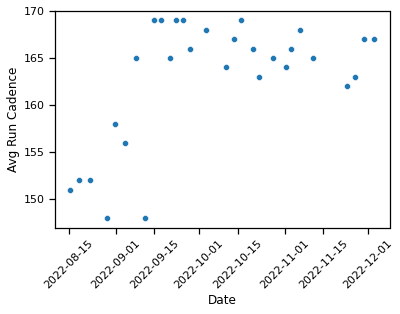

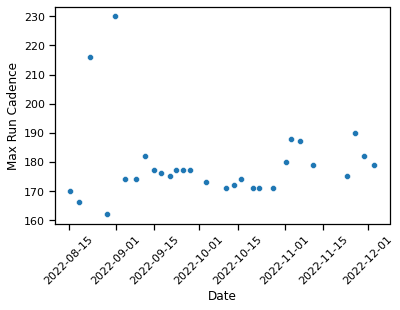

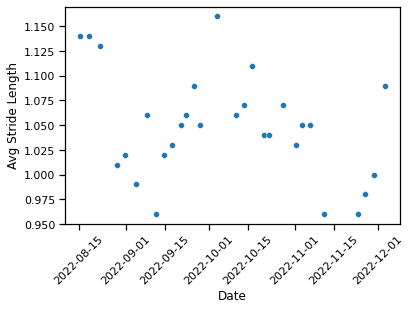

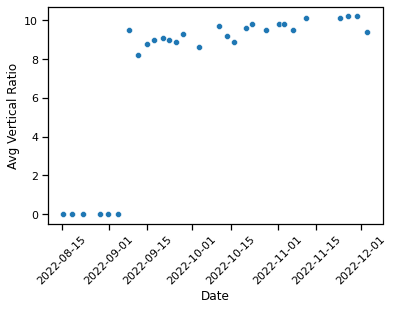

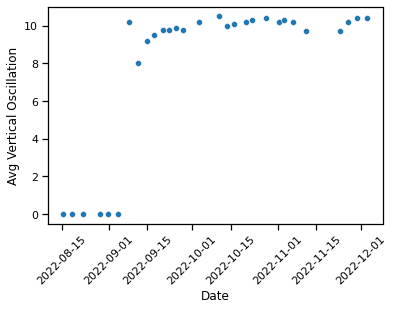

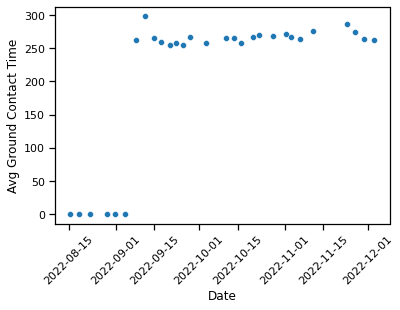

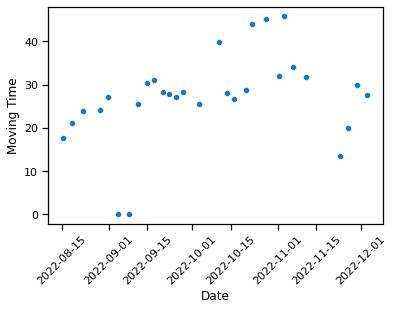

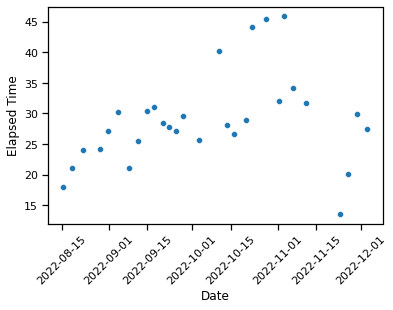

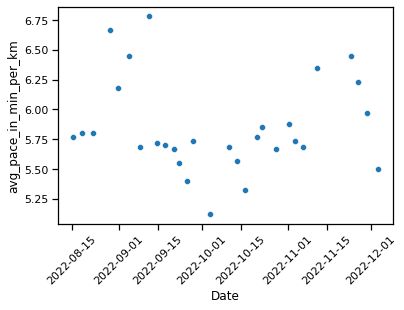

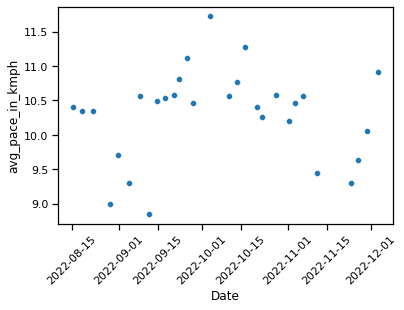

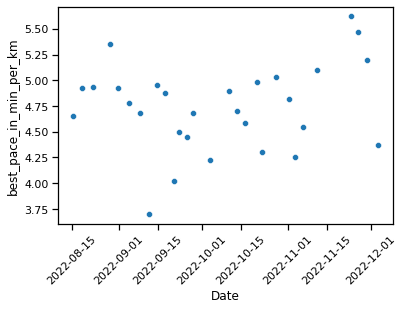

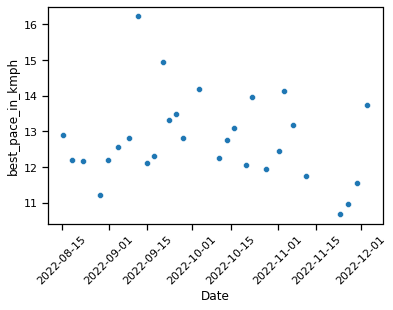

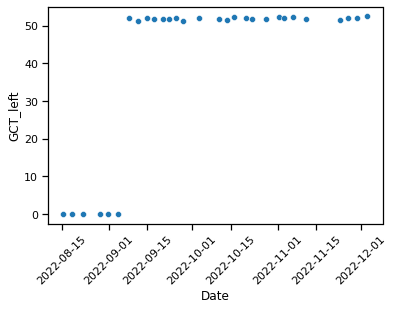

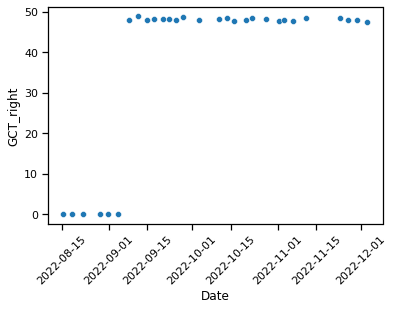

In [61]:
for cl in df.columns.to_list():
  if cl not in ['Date']:
    plt.figure()
    line=sns.scatterplot(data=df, x="Date", y=str(cl)) 
    plt.xticks(rotation=45)    
    plt.xlabel('Date',size=12)
    plt.show()
  else:
    continue

In [62]:
"""df_5k = df[(df['Distance']>4.9) & (df['Distance']<5.5)]
df_5k = df_5k.drop(['Time', 'Aerobic TE', 'best_pace_in_kmph', 'best_pace_in_min_per_km', 'Moving Time','Max Run Cadence','Calories'],axis=1)
df_5k = df_5k[['Date', 'Distance','Elapsed Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',
       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',
       'Avg Ground Contact Time', 'avg_pace_in_min_per_km','avg_pace_in_kmph',
       'GCT_left', 'GCT_right']]
df_5k.sort_values(by='Date')"""

"df_5k = df[(df['Distance']>4.9) & (df['Distance']<5.5)]\ndf_5k = df_5k.drop(['Time', 'Aerobic TE', 'best_pace_in_kmph', 'best_pace_in_min_per_km', 'Moving Time','Max Run Cadence','Calories'],axis=1)\ndf_5k = df_5k[['Date', 'Distance','Elapsed Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',\n       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',\n       'Avg Ground Contact Time', 'avg_pace_in_min_per_km','avg_pace_in_kmph',\n       'GCT_left', 'GCT_right']]\ndf_5k.sort_values(by='Date')"

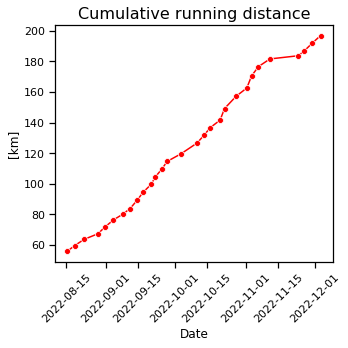

In [63]:
plt.figure(figsize=(5,5))
line=sns.lineplot(x=df.Date, y=df.Distance_cumsum, color="r", marker='o')
plt.xticks(rotation=45)
#plt.yticks(size=5, horizontalalignment='right',fontweight='light',fontsize='large')

plt.xlabel('Date',size=12)
plt.ylabel('[km]',size=12)
plt.title('Cumulative running distance',size=16)
plt.tight_layout()
plt.savefig('./images/cumulative_distance')
plt.show()

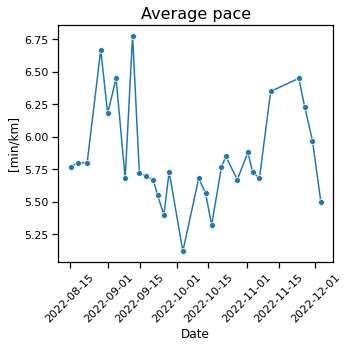

In [64]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df.avg_pace_in_min_per_km,marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[min/km]',size=12)
plt.title('Average pace',size=16)
plt.tight_layout()
plt.savefig('./images/avg_pace')

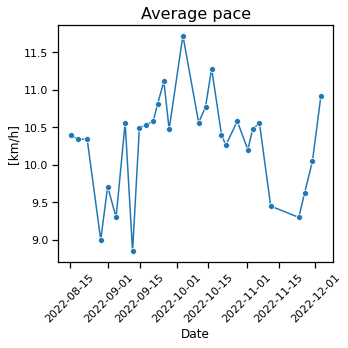

In [65]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df.avg_pace_in_kmph,marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[km/h]',size=12)
plt.title('Average pace',size=16)
plt.tight_layout()
plt.savefig('./images/avg_pace_kmph')

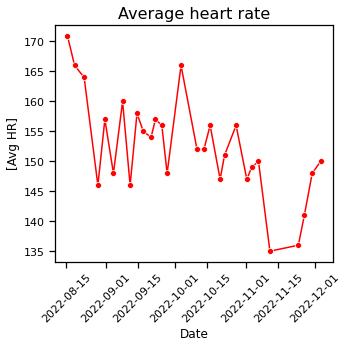

In [66]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df['Avg HR'],color='r',marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[Avg HR]',size=12)
plt.title('Average heart rate',size=16)
plt.tight_layout()
plt.savefig('./images/avg_hr')

In [67]:
df['normalized_pace'] = df['avg_pace_in_kmph']/df['Avg HR']

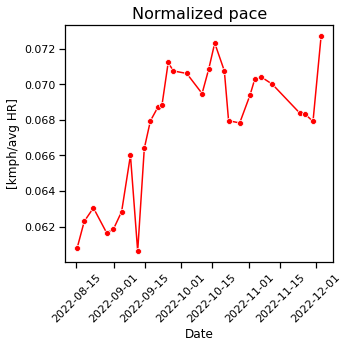

In [71]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df['normalized_pace'],color='r',marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[kmph/avg HR]',size=12)
plt.title('Normalized pace',size=16)
plt.tight_layout()
plt.savefig('./images/normalized_pace')

In [69]:
df['normalized_hr'] = df['Avg HR']/df['avg_pace_in_kmph']

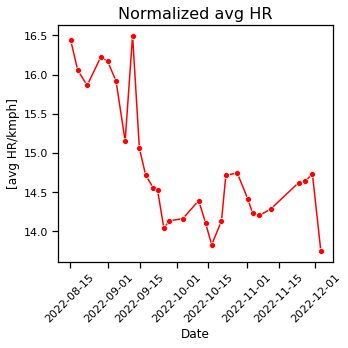

In [72]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df['normalized_hr'],color='r',marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[avg HR/kmph]',size=12)
plt.title('Normalized avg HR',size=16)
plt.tight_layout()
plt.savefig('./images/normalized_hr')
